In [1]:
# import libraries 
%matplotlib notebook
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# get receiver data every time steps 
import pyasdf
seisrec  = pyasdf.ASDFDataSet("/import/deadlock-data/taufiqurrahman/MESS2018/experiment_Maeda2016/seismogram_receiver.h5")

# displacement
uX_obs = np.stack(waveforms.displacement.select()[0].data for k, waveforms in enumerate(seisrec.waveforms))
uY_obs = np.stack(waveforms.displacement.select()[1].data for k, waveforms in enumerate(seisrec.waveforms))
uZ_obs = np.stack(waveforms.displacement.select()[2].data for k, waveforms in enumerate(seisrec.waveforms))

# velocity
vX_obs = np.stack(waveforms.velocity.select()[0].data for k, waveforms in enumerate(seisrec.waveforms))
vY_obs = np.stack(waveforms.velocity.select()[1].data for k, waveforms in enumerate(seisrec.waveforms))
vZ_obs = np.stack(waveforms.velocity.select()[2].data for k, waveforms in enumerate(seisrec.waveforms))

# acceleration
aX_obs = np.stack(waveforms.acceleration.select()[0].data for k, waveforms in enumerate(seisrec.waveforms))
aY_obs = np.stack(waveforms.acceleration.select()[1].data for k, waveforms in enumerate(seisrec.waveforms))
aZ_obs = np.stack(waveforms.acceleration.select()[2].data for k, waveforms in enumerate(seisrec.waveforms))

# spatial gradients
uXX_obs = np.stack(waveforms.gradient.select()[0].data for k, waveforms in enumerate(seisrec.waveforms))
uXY_obs = np.stack(waveforms.gradient.select()[1].data for k, waveforms in enumerate(seisrec.waveforms))
uXZ_obs = np.stack(waveforms.gradient.select()[2].data for k, waveforms in enumerate(seisrec.waveforms))
uYX_obs = np.stack(waveforms.gradient.select()[3].data for k, waveforms in enumerate(seisrec.waveforms))
uYY_obs = np.stack(waveforms.gradient.select()[4].data for k, waveforms in enumerate(seisrec.waveforms))
uYZ_obs = np.stack(waveforms.gradient.select()[5].data for k, waveforms in enumerate(seisrec.waveforms))
uZX_obs = np.stack(waveforms.gradient.select()[6].data for k, waveforms in enumerate(seisrec.waveforms))
uZY_obs = np.stack(waveforms.gradient.select()[7].data for k, waveforms in enumerate(seisrec.waveforms))
uZZ_obs = np.stack(waveforms.gradient.select()[8].data for k, waveforms in enumerate(seisrec.waveforms))

In [3]:
# get grid data every time steps 
import pyasdf
seisgrid = pyasdf.ASDFDataSet("/import/deadlock-data/taufiqurrahman/MESS2018/experiment_Maeda2016/seismogram_grid.h5")

# displacement
uX_grid = np.stack(waveforms.displacement.select()[0].data for k, waveforms in enumerate(seisgrid.waveforms))
uY_grid = np.stack(waveforms.displacement.select()[1].data for k, waveforms in enumerate(seisgrid.waveforms))
uZ_grid = np.stack(waveforms.displacement.select()[2].data for k, waveforms in enumerate(seisgrid.waveforms))

# velocity
vX_grid = np.stack(waveforms.velocity.select()[0].data for k, waveforms in enumerate(seisgrid.waveforms))
vY_grid = np.stack(waveforms.velocity.select()[1].data for k, waveforms in enumerate(seisgrid.waveforms))
vZ_grid = np.stack(waveforms.velocity.select()[2].data for k, waveforms in enumerate(seisgrid.waveforms))

# acceleration
aX_grid = np.stack(waveforms.acceleration.select()[0].data for k, waveforms in enumerate(seisgrid.waveforms))
aY_grid = np.stack(waveforms.acceleration.select()[1].data for k, waveforms in enumerate(seisgrid.waveforms))
aZ_grid = np.stack(waveforms.acceleration.select()[2].data for k, waveforms in enumerate(seisgrid.waveforms))

# spatial gradients
uXX_grid = np.stack(waveforms.gradient.select()[0].data for k, waveforms in enumerate(seisgrid.waveforms))
uXY_grid = np.stack(waveforms.gradient.select()[1].data for k, waveforms in enumerate(seisgrid.waveforms))
uXZ_grid = np.stack(waveforms.gradient.select()[2].data for k, waveforms in enumerate(seisgrid.waveforms))
uYX_grid = np.stack(waveforms.gradient.select()[3].data for k, waveforms in enumerate(seisgrid.waveforms))
uYY_grid = np.stack(waveforms.gradient.select()[4].data for k, waveforms in enumerate(seisgrid.waveforms))
uYZ_grid = np.stack(waveforms.gradient.select()[5].data for k, waveforms in enumerate(seisgrid.waveforms))
uZX_grid = np.stack(waveforms.gradient.select()[6].data for k, waveforms in enumerate(seisgrid.waveforms))
uZY_grid = np.stack(waveforms.gradient.select()[7].data for k, waveforms in enumerate(seisgrid.waveforms))
uZZ_grid = np.stack(waveforms.gradient.select()[8].data for k, waveforms in enumerate(seisgrid.waveforms))

In [4]:
# input receiver's location from csv file 
csv_rec_in = np.loadtxt('/import/deadlock-data/taufiqurrahman/MESS2018/experiment_Maeda2016/receiver.csv', delimiter=',')

# input grid's location from csv file 
csv_grid_in = np.loadtxt('/import/deadlock-data/taufiqurrahman/MESS2018/experiment_Maeda2016/grid.csv', delimiter=',')

In [5]:
! cat /import/deadlock-data/taufiqurrahman/MESS2018/experiment_Maeda2016/source.toml


[[source]]
name = "0000"
location = [127539.0, 76823.0, -60000.0]
spatial_type = "moment_tensor"
temporal_type = "ricker"
center_frequency = 0.25
scale = [1000000000.0, 1000000000.0, 1000000000.0, 0.0, 0.0, 0.0]


In [6]:
# append information to seismogram about distance between source epicenter to receivers & grids 
d_rec = np.zeros((2,csv_rec_in[0].size))
recx = csv_rec_in[0]
recy = csv_rec_in[1]
d_grid = np.zeros((2,csv_grid_in[0].size))
gridx = csv_grid_in[0]
gridy = csv_grid_in[1]
srcx_rec = np.zeros((1,csv_rec_in[0].size)) + 125.
srcy_rec = np.zeros((1,csv_rec_in[0].size)) + 75.
srcx_grid = np.zeros((1,csv_grid_in[0].size)) + 125.
srcy_grid = np.zeros((1,csv_grid_in[0].size)) + 75.
d_rec[0] = recx - srcx_rec
d_rec[1] = recy - srcy_rec
d_grid[0] = gridx - srcx_grid
d_grid[1] = gridy - srcy_grid
rec2src_distance = np.sqrt(d_rec[0]**2 + d_rec[1]**2)
grid2src_distance = np.sqrt(d_grid[0]**2 + d_grid[1]**2)

# sort seismogram from the closest to farthest distance to source 
# rec2src_distance_index = rec2src_distance.argsort()
# uZ_obs_sorted = uZ_obs[rec2src_distance_index[::-1]]
# grid2src_distance_index = grid2src_distance.argsort()
# uZ_grid_sorted = uZ_grid[grid2src_distance_index[::-1]]

<IPython.core.display.Javascript object>


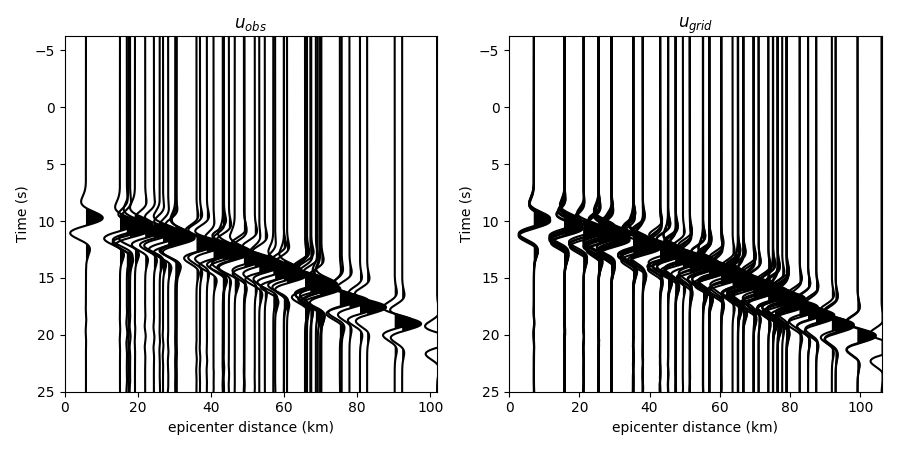

In [8]:
# plot seismograms with distance 
from wiggle import *
plt.figure(figsize=(9,4.5))

rec1 = uY_obs[:,:].T
rec2 = uY_grid[:,:].T
timevector = np.linspace(-6.237575,25.,rec1[:,0].size)

plt.subplot(1,2,1)
wiggle(rec1, timevector, rec2src_distance, color='k')
plt.xlim(0,np.max(rec2src_distance))
plt.xlabel('epicenter distance (km)')
plt.ylabel('Time (s)')
plt.title('$u_{obs}$')

plt.subplot(1,2,2)
wiggle(rec2, timevector, grid2src_distance, color='k')
plt.xlim(0,np.max(grid2src_distance))
plt.xlabel('epicenter distance (km)')
plt.ylabel('Time (s)')
plt.title('$u_{grid}$')

plt.tight_layout()
plt.show()

In [97]:
# plot seismograms with distance 
# fig = plt.figure(figsize=(9,4.5))
# ax1 = fig.add_subplot(1,2,1)
# ax2 = fig.add_subplot(1,2,2)

# rec1 = uZ_obs_sorted[:,:].T
# rec2 = uZ_grid_sorted[:,:].T
# vm1 = np.percentile(rec1, 99)
# vm2 = np.percentile(rec2, 99)
# ax1.imshow(  rec1, cmap="Greys", vmin=-vm1,  vmax=vm1,  aspect='auto')
# ax2.imshow(  rec2, cmap="Greys", vmin=-vm2,  vmax=vm2,  aspect='auto')
# ax1.set_xlabel('receiver number')
# ax2.set_xlabel('grid point')
# ax1.set_ylabel('time step')
# ax2.set_ylabel('time step')

# plt.tight_layout()
# plt.show()